In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pybedtools
%matplotlib inline

In [53]:
## Upload the file with basic headers.
df = pd.read_csv("/Users/heskett/acp.phasing.analysis/pat1_imputed_phased.noheader.txt",sep="\t",header=None,index_col=None,
            names=["chrom","pos","rsid","ref","alt","qual","filter","info","format","son","dad","mom"],
            dtype = {"chrom":str,"pos":int,"rsid":str,"ref":str,"alt":str,"qual":str,"filter":str,
                                 "info":str,"format":str,"son":str,"dad":str,"mom":str})

In [54]:
## get df of all phased variants in son
df_son_phased = df[df["son"].str.contains("|",regex=False)]
df_son_phased["dist_to_next"] = df_son_phased["pos"].diff(periods=-1) *-1

/Users/heskett/packages/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [67]:
df_son_phased

,chrom,pos,rsid,ref,alt,qual,filter,info,format,son,dad,mom,dist_to_next
27,chr1,14464,rs546169444,A,T,.,PASS,AR2=0;DR2=0;IMP;AF=1;AN=6;AC=4,GT:DS:GP:PS,"0|1:1:0,1,0:10407","1|0:0.99:0.01,0.99,0:10407","1/1:2:0,0,1:.",135.0
30,chr1,14599,rs707680,T,A,.,PASS,AR2=0;DR2=0;IMP;AF=0.2;AN=6;AC=2,GT:DS:GP:PS,"1|0:1:0,1,0:10407","1|0:0.99:0.01,0.99,0:10407","0/0:0.4:0.64,0.32,0.04:.",5.0
31,chr1,14604,rs541940975,A,G,.,PASS,AR2=0;DR2=0;IMP;AF=0.2;AN=6;AC=2,GT:DS:GP:PS,"1|0:1:0,1,0:10407","1|0:0.99:0.01,0.99,0:10407","0/0:0.4:0.64,0.32,0.04:.",49.0
33,chr1,14653,rs62635297,C,T,66.64,.,BaseQRankSum=0.56;DB;ExcessHet=3.0103;FS=0;MQ=...,GT:AD:DP:GQ:PL:PS,"0|1:8,4:12:74:74,0,204:10407",0/0:.:.:.:.:.,"1|0:4,2:6:54:54,0,115:10407",558.0
40,chr1,15211,rs3982632,T,G,.,PASS,AR2=0;DR2=0;IMP;AF=0.63;AN=6;AC=4,GT:DS:GP:PS,"0|1:1.22:0.14,0.5,0.36:10407","0|1:0.99:0.01,0.99,0:10407","1/1:1.25:0.14,0.47,0.39:.",609.0
49,chr1,15820,rs2691315,G,T,.,PASS,AR2=0;DR2=0;IMP;AF=0.62;AN=6;AC=3,GT:DS:GP:PS,"0|1:1.21:0,0.78,0.21:10407","0/0:0.24:0.76,0.24,0:.","1/1:1.24:0.15,0.47,0.38:.",675.0
61,chr1,16495,rs3210724,G,C,111.96,.,BaseQRankSum=-1.221;DB;ExcessHet=3.0103;FS=0;M...,GT:AD:DP:GQ:PL:PS,"0|1:5,5:10:99:117,0,155:10407",0/0:.:.:.:.:.,"1/1:0,5:5:15:126,15,0:.",2827.0
73,chr1,19322,rs878922511,C,T,73.64,.,BaseQRankSum=-0.674;DB;ExcessHet=3.0103;FS=0;M...,GT:AD:DP:GQ:PL:PS,"0|1:3,3:6:58:58,0,79:10407",0/0:.:.:.:.:.,"1|0:2,4:6:40:81,0,40:10407",19908.0
79,chr1,39230,rs11489801,G,A,43.64,.,BaseQRankSum=1.611;DB;ExcessHet=3.0103;FS=3.33...,GT:AD:DP:GQ:PL:PS,"1|0:6,2:8:38:38,0,132:10407","1|0:6,2:8:51:51,0,146:10407",0/0:.:.:.:.:.,25.0
80,chr1,39255,rs11489803,A,C,88.64,.,BaseQRankSum=1.465;DB;ExcessHet=3.0103;FS=0;MQ...,GT:AD:DP:GQ:PL:PS,"1|0:5,2:7:69:69,0,204:10407","1|0:5,4:9:96:96,0,139:10407",0/0:.:.:.:.:.,6.0


In [61]:
df_son_phased[(df_son_phased["dist_to_next"]>=0) & (df_son_phased["dist_to_next"]<=30000)]["dist_to_next"].describe(percentiles=[.8,0.99])

count    1.410674e+06
mean     1.368029e+03
std      2.958518e+03
min      1.000000e+00
50%      4.080000e+02
80%      1.650000e+03
99%      1.665627e+04
max      2.999800e+04
Name: dist_to_next, dtype: float64

(array([346545., 156076., 111857.,  85206.,  68537.,  57204.,  48538.,
         42279.,  36837.,  32691.,  28920.,  25862.,  23295.,  20943.,
         18871.,  16903.,  15502.,  14254.,  13136.,  11995.,  11220.,
         10288.,   9502.,   8836.,   8115.,   7612.,   7139.,   6649.,
          6350.,   5883.,   5435.,   5244.,   4869.,   4649.,   4357.,
          4189.,   3957.,   3688.,   3490.,   3337.,   3166.,   2961.,
          2857.,   2801.,   2577.,   2480.,   2403.,   2283.,   2204.,
          2074.,   2066.,   1867.,   1842.,   1800.,   1759.,   1639.,
          1534.,   1613.,   1470.,   1442.,   1488.,   1297.,   1326.,
          1294.,   1272.,   1144.,   1151.,   1141.,   1064.,   1012.,
          1009.,    974.,    956.,    966.,    938.,    900.,    822.,
           829.,    799.,    756.,    754.,    737.,    683.,    701.,
           683.,    680.,    645.,    616.,    605.,    619.,    629.,
           606.,    564.,    549.,    588.,    547.,    539.,    493.,
      

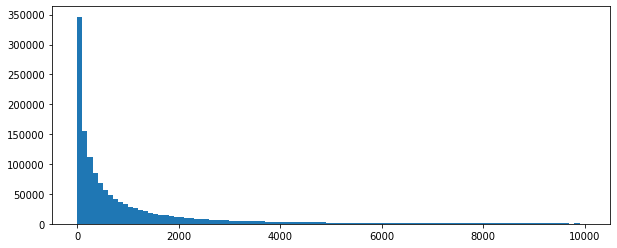

In [65]:
fig, ax = plt.subplots(figsize=(10,4))
plt.hist(df_son_phased[(df_son_phased["dist_to_next"]<=10000) & (df_son_phased["dist_to_next"]>=0)]["dist_to_next"],bins=100)


In [66]:
df_son_phased

,chrom,pos,rsid,ref,alt,qual,filter,info,format,son,dad,mom,dist_to_next
27,chr1,14464,rs546169444,A,T,.,PASS,AR2=0;DR2=0;IMP;AF=1;AN=6;AC=4,GT:DS:GP:PS,"0|1:1:0,1,0:10407","1|0:0.99:0.01,0.99,0:10407","1/1:2:0,0,1:.",135.0
30,chr1,14599,rs707680,T,A,.,PASS,AR2=0;DR2=0;IMP;AF=0.2;AN=6;AC=2,GT:DS:GP:PS,"1|0:1:0,1,0:10407","1|0:0.99:0.01,0.99,0:10407","0/0:0.4:0.64,0.32,0.04:.",5.0
31,chr1,14604,rs541940975,A,G,.,PASS,AR2=0;DR2=0;IMP;AF=0.2;AN=6;AC=2,GT:DS:GP:PS,"1|0:1:0,1,0:10407","1|0:0.99:0.01,0.99,0:10407","0/0:0.4:0.64,0.32,0.04:.",49.0
33,chr1,14653,rs62635297,C,T,66.64,.,BaseQRankSum=0.56;DB;ExcessHet=3.0103;FS=0;MQ=...,GT:AD:DP:GQ:PL:PS,"0|1:8,4:12:74:74,0,204:10407",0/0:.:.:.:.:.,"1|0:4,2:6:54:54,0,115:10407",558.0
40,chr1,15211,rs3982632,T,G,.,PASS,AR2=0;DR2=0;IMP;AF=0.63;AN=6;AC=4,GT:DS:GP:PS,"0|1:1.22:0.14,0.5,0.36:10407","0|1:0.99:0.01,0.99,0:10407","1/1:1.25:0.14,0.47,0.39:.",609.0
49,chr1,15820,rs2691315,G,T,.,PASS,AR2=0;DR2=0;IMP;AF=0.62;AN=6;AC=3,GT:DS:GP:PS,"0|1:1.21:0,0.78,0.21:10407","0/0:0.24:0.76,0.24,0:.","1/1:1.24:0.15,0.47,0.38:.",675.0
61,chr1,16495,rs3210724,G,C,111.96,.,BaseQRankSum=-1.221;DB;ExcessHet=3.0103;FS=0;M...,GT:AD:DP:GQ:PL:PS,"0|1:5,5:10:99:117,0,155:10407",0/0:.:.:.:.:.,"1/1:0,5:5:15:126,15,0:.",2827.0
73,chr1,19322,rs878922511,C,T,73.64,.,BaseQRankSum=-0.674;DB;ExcessHet=3.0103;FS=0;M...,GT:AD:DP:GQ:PL:PS,"0|1:3,3:6:58:58,0,79:10407",0/0:.:.:.:.:.,"1|0:2,4:6:40:81,0,40:10407",19908.0
79,chr1,39230,rs11489801,G,A,43.64,.,BaseQRankSum=1.611;DB;ExcessHet=3.0103;FS=3.33...,GT:AD:DP:GQ:PL:PS,"1|0:6,2:8:38:38,0,132:10407","1|0:6,2:8:51:51,0,146:10407",0/0:.:.:.:.:.,25.0
80,chr1,39255,rs11489803,A,C,88.64,.,BaseQRankSum=1.465;DB;ExcessHet=3.0103;FS=0;MQ...,GT:AD:DP:GQ:PL:PS,"1|0:5,2:7:69:69,0,204:10407","1|0:5,4:9:96:96,0,139:10407",0/0:.:.:.:.:.,6.0
